In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import torch.optim as optim
from sklearn.metrics import mean_absolute_error

## **Data Preparation**

In [ ]:
num_data = 12
x1 = np.random.rand(num_data) *10
e = np.random.normal(0, 0.5, num_data)
X= np.array([x1]).T  # T for transpose from (2, 2400) to (2400, 2)
y=x1+2*e

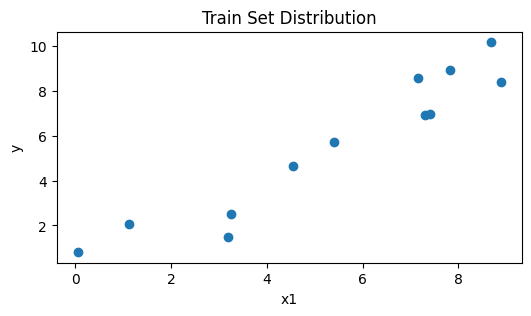

In [ ]:
fig = plt.figure(figsize=(6,3))

ax1 = fig.add_subplot(1, 1, 1) # size 1 row, 1 col, location 1
ax1.scatter(X[:, 0], y)

ax1.set_xlabel('x1')
# ax1.set_ylabel('x2')
ax1.set_ylabel('y')
ax1.set_title('Train Set Distribution')


plt.show()

## **Model(Hypothesis) Define**

In [ ]:
def cost(h,X, Y):
    error = 0
    for i in range(len(X)):
        error += (h*X[i] - Y[i])**2
    error = error / len(X)
    return error

## **Cost(Loss) Function**

[-10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]
[array([4536.12709877]), array([4134.59887727]), array([3751.67855522]), array([3387.36613263]), array([3041.6616095]), array([2714.56498582]), array([2406.0762616]), array([2116.19543684]), array([1844.92251153]), array([1592.25748567]), array([1358.20035928]), array([1142.75113234]), array([945.90980485]), array([767.67637682]), array([608.05084825]), array([467.03321913]), array([344.62348947]), array([240.82165926]), array([155.62772851]), array([89.04169722]), array([41.06356538]), array([11.693333]), array([0.93100007]), array([8.7765666]), array([35.23003259]), array([80.29139803]), array([143.96066293]), array([226.23782728]), array([327.12289109]), array([446.61585436]), array([584.71671708]), array([741.42547926]), array([916.74214089]), array([1110.66670198

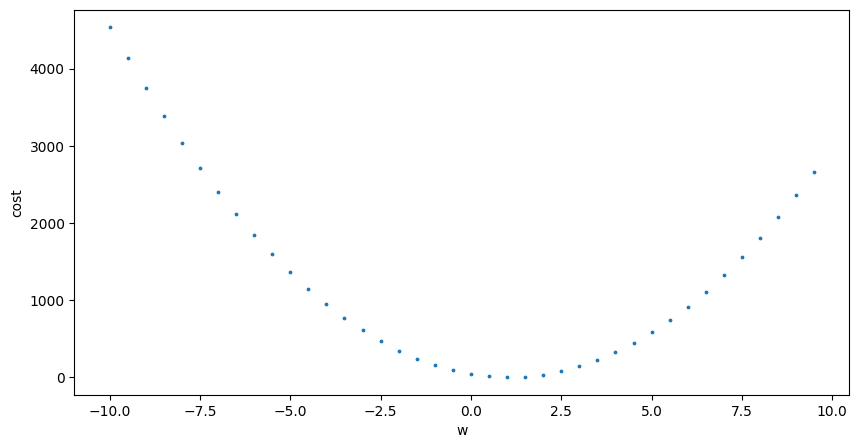

In [ ]:
list_w = []
list_c = []
for i in range(-20, 20):
    w = i * 0.5
    h = w
    c = cost(h, X, y)
    list_w.append(w)
    list_c.append(c)
    
print(list_w)
print(list_c) 

plt.figure(figsize=(10,5))
plt.xlabel('w')
plt.ylabel('cost')
plt.scatter(list_w, list_c, s=3)


##**Gradient Decent**

In [ ]:
def cal_grad(w, cost): 
    h=w
    cost1 = cost(h, X, y)
    eps = 0.00001 
    w= w+eps 
    cost2 = cost(w, X, y)
    dcost = cost2 - cost1
    dw = eps
    grad = dcost / dw
    return grad, (cost1+cost2)*0.5


##**Running case: Testing two different gradient decent models**

[1.03918221] [0.87385011]


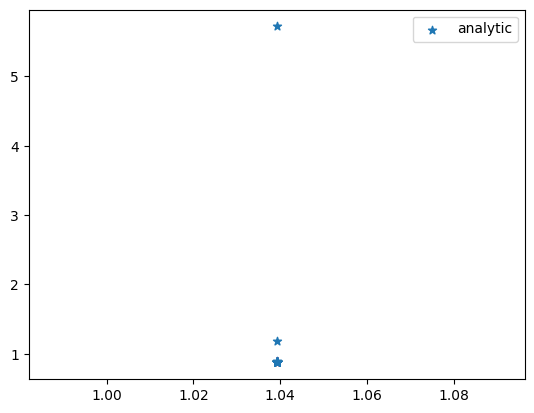

In [ ]:
 # ===== Initializing weights (w) ==== #
w = 1.4

# ===== Learning rate ===== #

lr = 0.01

list_w = []
list_c = []

for i in range(100): 
    grad, mean_cost = cal_grad(w, cost)

    w -= lr * grad
    list_w.append(w)
    list_c.append(mean_cost)
    
print(w, mean_cost) 

plt.scatter(list_w, list_c, label='analytic', marker='*')
plt.legend()

##**Checking results: Best fit**

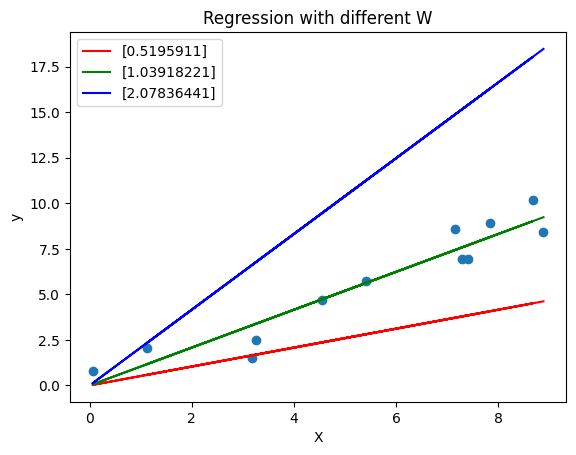

In [ ]:
import numpy as np
x_grid = X
pred_y1 = (w/2)* x_grid
pred_y2 = w* x_grid
pred_y3 = (w*2)* x_grid

plt.plot(X,pred_y1, color='r', label=w/2)
plt.plot(X,pred_y2, color='g', label=w)
plt.plot(X,pred_y3, color='b', label=2*w)
plt.scatter(X,y)
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("X")
plt.ylabel("y")
plt.title("Regression with different W")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

plt.show()

##**Checking results: Differen Learning rate**

In [ ]:
import time
from logging import LogRecord
# ===== Initializing weights (w) ==== #
w = 1.4

# ===== Learning rate ===== #

lr = [0.001, 0.01,0.1]

list_w = []
list_c = []
time_el=[]
for j in range(len(lr)):

  start = time.time()
  for i in range(100): 
    grad, mean_cost = cal_grad(w, cost)

    w -= lr[j] * grad
  end = time.time()
  time_el.append(float(end-start))
  list_w.append(float(w))
  list_c.append(float(mean_cost))


In [ ]:
time_el

[0.026671409606933594, 0.016620635986328125, 0.012476444244384766]

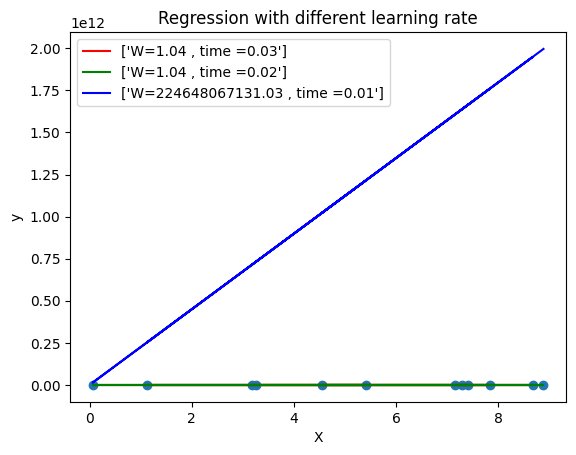

In [ ]:
import numpy as np
x_grid = X
pred_y1 = list_w[0]* x_grid
pred_y2 = list_w[1]* x_grid
pred_y3 = list_w[2]* x_grid

plt.plot(X,pred_y1, color='r', label=["W=%.2f , time =%.2f" %(list_w[0], time_el[0])])
           
plt.plot(X,pred_y2, color='g', label=["W=%.2f , time =%.2f" %(list_w[1], time_el[1])])
plt.plot(X,pred_y3, color='b', label=["W=%.2f , time =%.2f" %(list_w[2], time_el[2])])
plt.scatter(X,y)
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("X")
plt.ylabel("y")
plt.title("Regression with different learning rate")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

plt.show()